In [8]:
!pip install -U langchain-openai --q
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI

In [9]:

os.environ["OPENAI_API_KEY"] = userdata.get('open_router')
llm = ChatOpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ["OPENAI_API_KEY"],
    model="qwen/qwen2.5-vl-32b-instruct:free",
    temperature=0
)

Image loaded successfully.
Format: JPEG
Size: (600, 400)
Mode: RGB


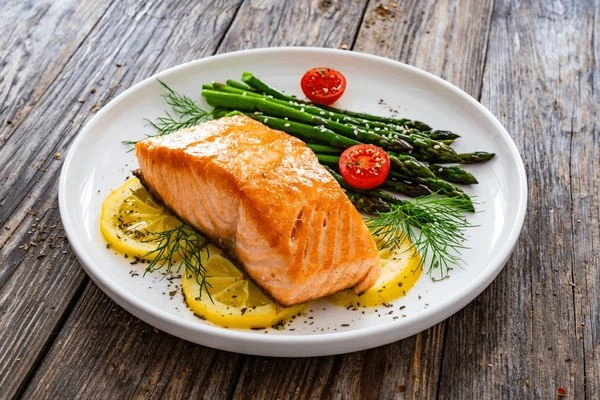

In [11]:
from PIL import Image

image_path="/content/food_image.jpg"
img=Image.open(image_path)
print(f"Image loaded successfully.")
print(f"Format: {img.format}")
print(f"Size: {img.size}")
print(f"Mode: {img.mode}")
display(img)

image_to_analyze = img

In [14]:
import base64
import io

def encode_image_to_base64(image_path_or_pil):
  if isinstance(image_path_or_pil, str):   #if file path
    if not os.path.exists(image_path_or_pil):
      raise FileNotFoundError(f"File not found: {image_path_or_pil}")
    else:
      with open(image_path_or_pil, "rb") as image_file:
        return base64.b64decode(image_file.read()).decode("utf-8")

  elif isinstance(image_path_or_pil, Image.Image):
    buffered = io.BytesIO()
    image_path_or_pil.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

  else:
    raise ValueError("Input must be a file path (str) or a PIL Image object.")

In [24]:
def query_llm(llm,image,prompt,max_tokens=100):
  base64_image=encode_image_to_base64(image)
  try:
    #constructing message payload
    message=[
        {
            "role":"user",
            "content":[
                {
                    "type":"text",
                    "text":prompt
                },
                {
                    "type":"image_url",
                    "image_url":{
                        "url":f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
    #calling api
    response=llm.invoke(message)
    #return the output text
    return response.content

  except Exception as e:
        return f"Error calling API: {e}"


In [25]:
structured_nutrition_prompt="""
#Nutrirtion Analysis Task

## Context
you are a nutrirtion expert analyzing food images to provide accurate nutritional information.

## Instruction
Analyze the food item in the image and provide estimated nutrirtion information

## input
- an image of food item

## output
provide the following estimated nutrirtion values for typical serving size or per 100g
- food_name (string)
- serving_description (string, e.g '1 slice','plate','100g')
- calories (float)
- total_fat (float)
- total_carbohydrate (float)
- dietary_fiber (float)
- sugars (float)
- protein (float)
- confidence_level (string: 'High', 'Medium', or 'Low')

**IMPORTANT:** Respond ONLY with a single JSON object containing these fields. Do not include any other text, explanations, or apologies. The JSON keys must match exactly be what is in output format . If you cannot estimate a value, use `null`.
Example valid JSON response:
{
  "food_name": "Banana",
  "serving_description": "1 medium banana (approx 118g)",
  "calories": 105.0,
  "fat_grams": 0.4,
  "protein_grams": 1.3,
  "confidence_level": "High"
  "Total fat"; 0.3,
  "Total carbohydrate": 27,
  "Protein": 1.3
}
"""

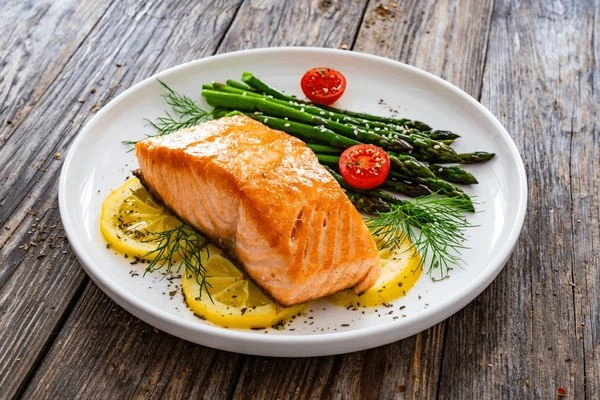

{
  "food_name": "Grilled Salmon with Asparagus and Lemon",
  "serving_description": "1 fillet (approx 150g) with vegetables",
  "calories": 300.0,
  "total_fat": 15.0,
  "total_carbohydrate": 5.0,
  "dietary_fiber": 2.0,
  "sugars": 1.0,
  "protein": 25.0,
  "confidence_level": "Medium"
}


In [27]:
result=query_llm(
    llm=llm,
    image=image_to_analyze,
    prompt=structured_nutrition_prompt
)
display(image_to_analyze)
print(result)

Image loaded successfully.
Format: PNG
Size: (1536, 1024)
Mode: RGB


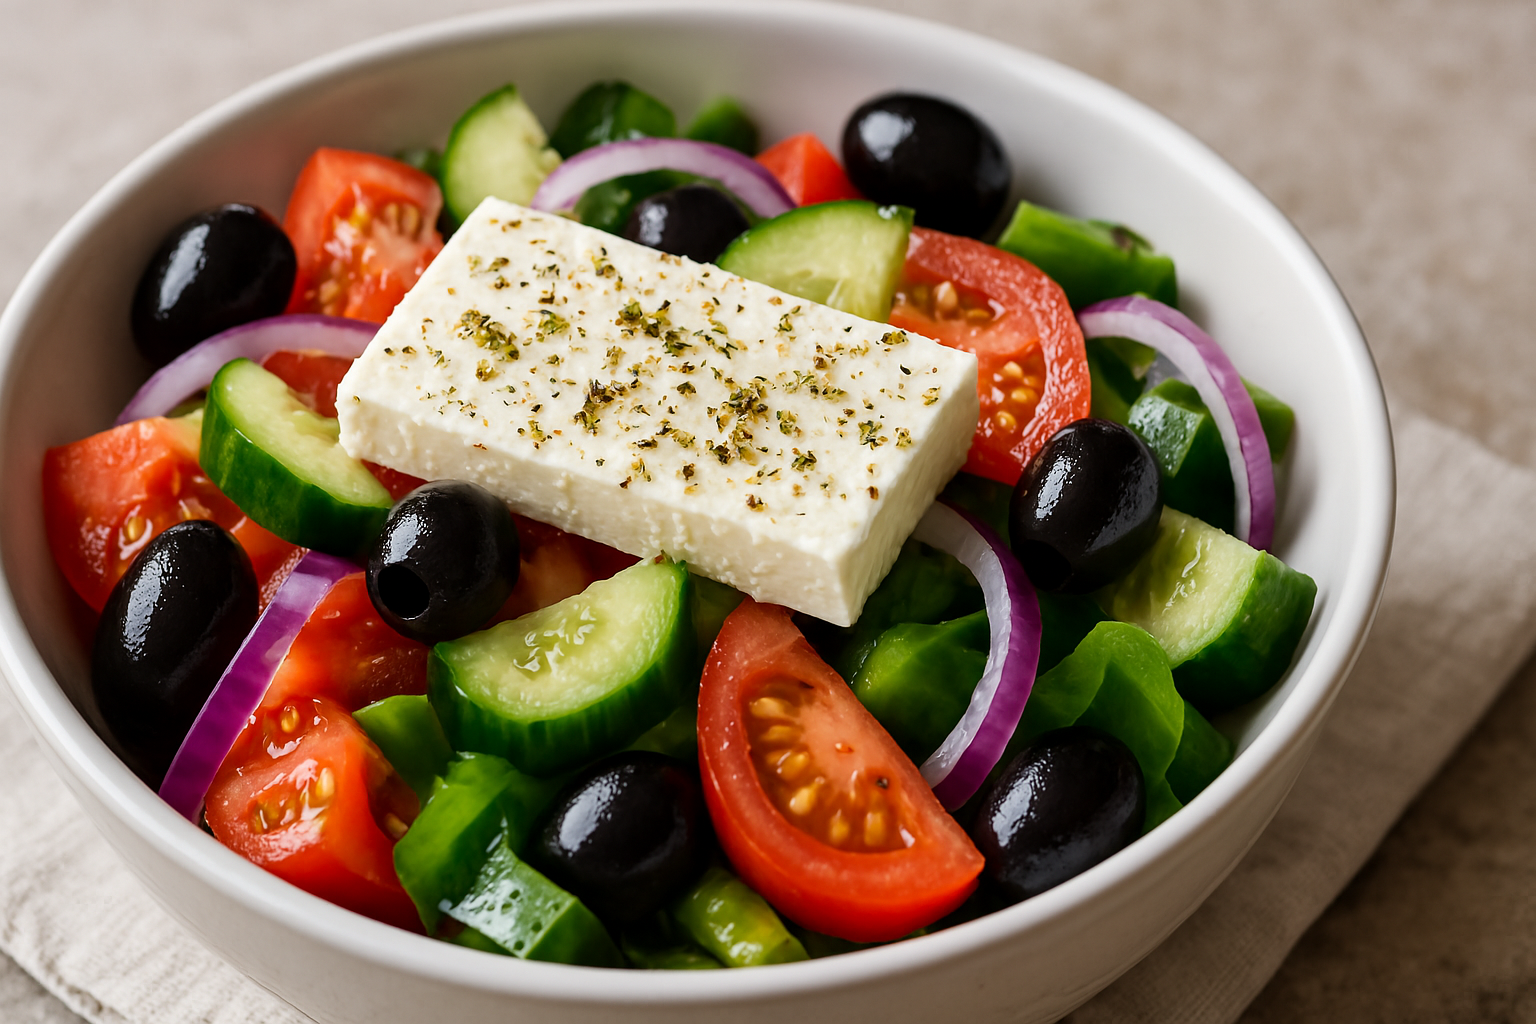

{
  "food_name": "Greek Salad",
  "serving_description": "1 bowl (approx 200g)",
  "calories": 150.0,
  "total_fat": 10.0,
  "total_carbohydrate": 10.0,
  "dietary_fiber": 3.0,
  "sugars": 4.0,
  "protein": 8.0,
  "confidence_level": "Medium"
}


In [28]:
image_path="/content/greek_salad.png"
image=Image.open(image_path)
print(f"Image loaded successfully.")
print(f"Format: {image.format}")
print(f"Size: {image.size}")
print(f"Mode: {image.mode}")
display(image)

result=query_llm(
    llm=llm,
    image=image,
    prompt=structured_nutrition_prompt
)
print(result)

Image loaded successfully.
Format: PNG
Size: (1536, 1024)
Mode: RGB


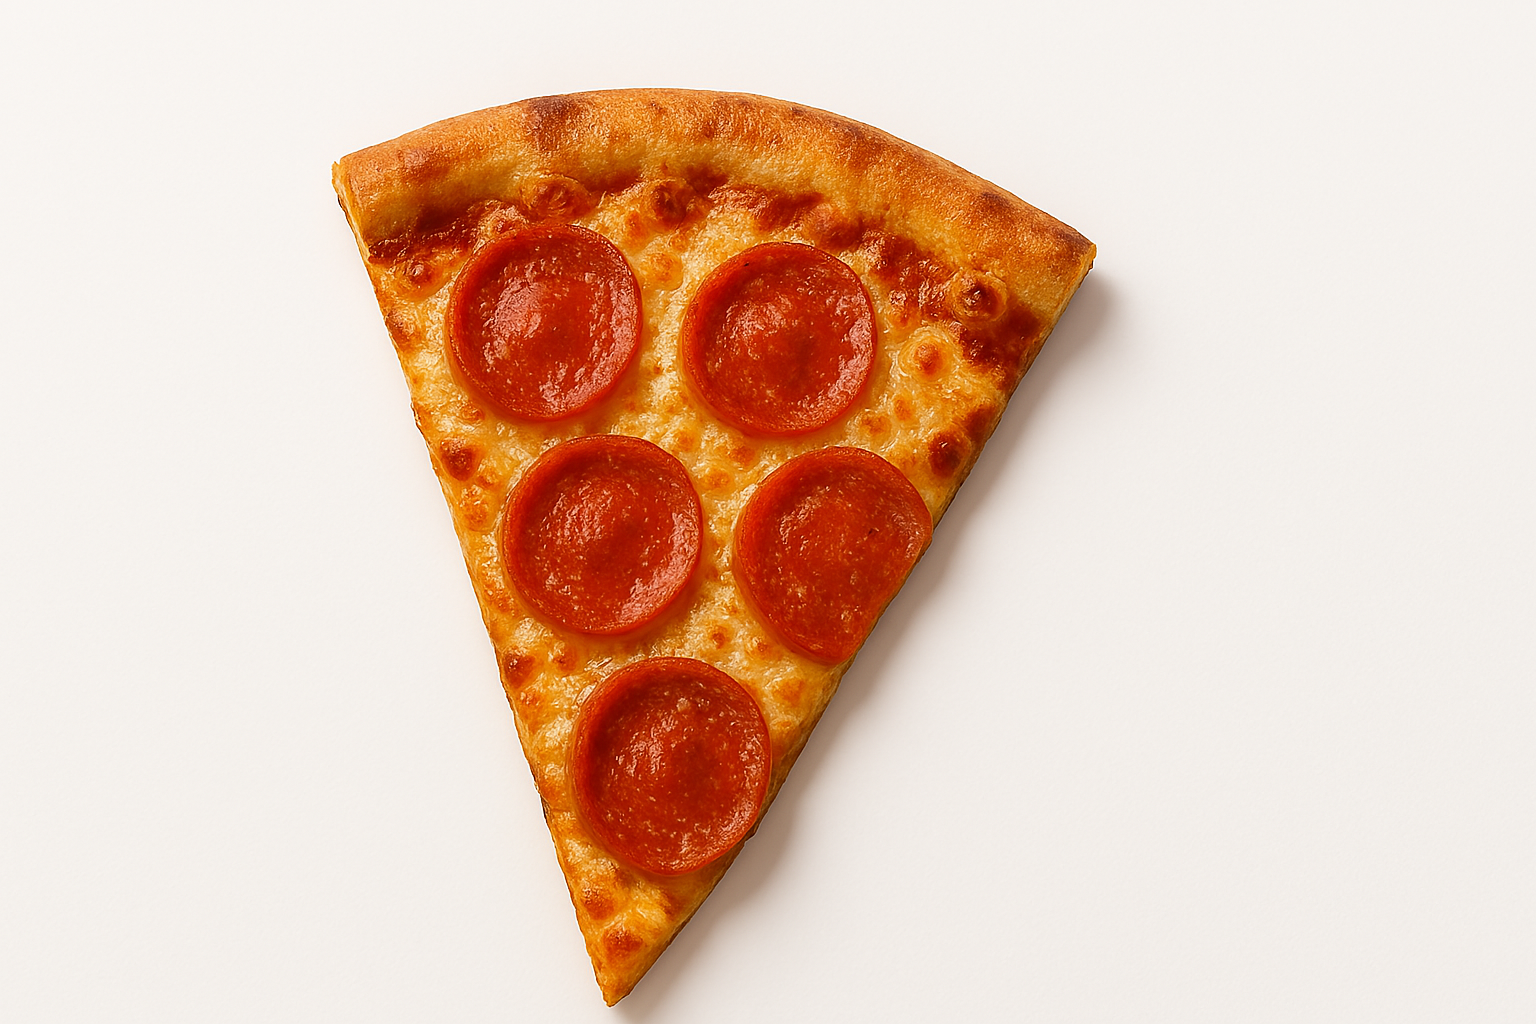

{
  "food_name": "Pepperoni Pizza",
  "serving_description": "1 slice (approx 120g)",
  "calories": 280.0,
  "total_fat": 12.0,
  "total_carbohydrate": 30.0,
  "dietary_fiber": 1.0,
  "sugars": 3.0,
  "protein": 12.0,
  "confidence_level": "Medium"
}


In [29]:
image_path="/content/pizza_slice.png"
image=Image.open(image_path)
print(f"Image loaded successfully.")
print(f"Format: {image.format}")
print(f"Size: {image.size}")
print(f"Mode: {image.mode}")
display(image)

result=query_llm(
    llm=llm,
    image=image,
    prompt=structured_nutrition_prompt
)
print(result)